# Where to stay in Tokyo?

Recently, Japanese government has restricted the rule on sharing home and Airbnb style accomodations are diminishing in Japan. As Japan is preparing for the 2020 Olympic game, where to stay is a big problem.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [2]:
%%html
<blockquote class="twitter-tweet" data-lang="en-gb"><p lang="en" dir="ltr">A new law in Japan has caused Airbnb to remove 80% of its home-share listings in the country. <a href="https://t.co/Yz2Bfagb2f">https://t.co/Yz2Bfagb2f</a><br><br>If you are visiting soon, what will you do? <br><br>Please vote and tweet your thoughts at us. We\'d like to use your comments in an article.</p>&mdash; Nikkei Asian Review (@NAR) <a href="https://twitter.com/NAR/status/1006857347916918784?ref_src=twsrc%5Etfw">13 June 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

## Questions:

* Does Tokyo have enough accomodations?
* Where is convinient to go to the stadium, etc?
* Where is the most friendly area for foreigners?

Japan's largest online travel agency Rakuten opens their API to the public and hotel informations could be obtained.

### Get Area Class API

First step is to obtain the area codes. Rakuten classifies central Tokyo into 9 areas [A-I].

https://webservice.rakuten.co.jp/api/getareaclass/

Request URL
`https://app.rakuten.co.jp/services/api/Travel/GetAreaClass/20131024?applicationId=[id]`

In [3]:
response = requests.get("https://app.rakuten.co.jp/services/api/Travel/GetAreaClass/20131024?applicationId=XXXXXX")
data = response.json()
data

{'areaClasses': {'largeClasses': [{'largeClass': [{'largeClassCode': 'japan',
      'largeClassName': '日本'},
     {'middleClasses': [{'middleClass': [{'middleClassCode': 'hokkaido',
          'middleClassName': '北海道'},
         {'smallClasses': [{'smallClass': [{'smallClassCode': 'sapporo',
              'smallClassName': '札幌'},
             {'detailClasses': [{'detailClass': {'detailClassCode': 'A',
                 'detailClassName': '札幌・新札幌・琴似'}},
               {'detailClass': {'detailClassCode': 'B',
                 'detailClassName': '大通公園・時計台・狸小路'}},
               {'detailClass': {'detailClassCode': 'C',
                 'detailClassName': 'すすきの・中島公園'}}]}]},
           {'smallClass': [{'smallClassCode': 'jozankei',
              'smallClassName': '定山渓'}]},
           {'smallClass': [{'smallClassCode': 'wakkanai',
              'smallClassName': '稚内・留萌・利尻・礼文'}]},
           {'smallClass': [{'smallClassCode': 'abashiri',
              'smallClassName': '網走・紋別・北見・知床'}]},
        

In [4]:
local_list = []
for pref in data['areaClasses']['largeClasses'][0]['largeClass'][1:]:
    for city in pref['middleClasses']:
        for area in city['middleClass'][1:]:
            for local in area['smallClasses'][0]['smallClass']:
                try:
                    local_list.append(local['detailClasses'])
                except:
                    pass
                
for detail in local_list[1]:
    print(detail['detailClass'])

{'detailClassCode': 'A', 'detailClassName': '東京駅・銀座・秋葉原・東陽町・葛西'}
{'detailClassCode': 'B', 'detailClassName': '新橋・汐留・浜松町・お台場'}
{'detailClassCode': 'C', 'detailClassName': '赤坂・六本木・霞ヶ関・永田町'}
{'detailClassCode': 'D', 'detailClassName': '渋谷・恵比寿・目黒・二子玉川'}
{'detailClassCode': 'E', 'detailClassName': '品川・大井町・蒲田・羽田空港'}
{'detailClassCode': 'F', 'detailClassName': '新宿・中野・荻窪・四谷'}
{'detailClassCode': 'G', 'detailClassName': '池袋・赤羽・巣鴨・大塚'}
{'detailClassCode': 'H', 'detailClassName': '東京ドーム・飯田橋・御茶ノ水'}
{'detailClassCode': 'I', 'detailClassName': '上野・浅草・錦糸町・新小岩・北千住'}


### Hotel Search API
Next, search for the hotel locations and number of rooms. Fortunately, `latitude` and `longitude` are in the data set.

https://webservice.rakuten.co.jp/api/simplehotelsearch/

`https://app.rakuten.co.jp/services/api/Travel/SimpleHotelSearch/20170426?applicationId=[id]&format=json&datumType=1
&responseType=large&largeClassCode=japan&middleClassCode=tokyo&smallClassCode=tokyo&detailClassCode=[code]&page=[num]`

In [5]:
hotel_list = []
for i in ['A','B','C','D','E','F','G','H','I']:
    for j in range(1,14):
        try:
            response = requests.get("https://app.rakuten.co.jp/services/api/Travel/SimpleHotelSearch/20170426?applicationId=XXXXXX&format=json&datumType=1&responseType=large&largeClassCode=japan&middleClassCode=tokyo&smallClassCode=tokyo&detailClassCode="+i+"&page="+str(j))
            data = response.json()
            page_count = data['pagingInfo']['pageCount']
            page = data['pagingInfo']['page']
            for hotel in data['hotels']:
                hotel_dic = {}
                hotel_dic['area'] = i
                hotel_dic['page'] = page
                hotel_dic['pageCount'] = page_count
                hotel_dic['hotelNo'] = hotel['hotel'][0]['hotelBasicInfo']['hotelNo']
                hotel_dic['hotel'] = hotel['hotel'][0]['hotelBasicInfo']['hotelName']
                hotel_dic['latitude'] = hotel['hotel'][0]['hotelBasicInfo']['latitude']
                hotel_dic['longitude'] = hotel['hotel'][0]['hotelBasicInfo']['longitude']
                hotel_dic['hotelMinCharge'] = hotel['hotel'][0]['hotelBasicInfo']['hotelMinCharge']
                hotel_dic['RoomNum'] = hotel['hotel'][3]['hotelFacilitiesInfo']['hotelRoomNum']
                hotel_list.append(hotel_dic)
        except:
            pass
hotel_list

[{'area': 'A',
  'page': 1,
  'pageCount': 8,
  'hotelNo': 74637,
  'hotel': 'アパホテル＜東京潮見駅前＞',
  'latitude': 35.65790168,
  'longitude': 139.8188291,
  'hotelMinCharge': 3000,
  'RoomNum': 706},
 {'area': 'A',
  'page': 1,
  'pageCount': 8,
  'hotelNo': 141356,
  'hotel': 'スーパーホテルＬｏｈａｓ東京駅八重洲中央口\u3000八重桜の湯',
  'latitude': 35.67922715,
  'longitude': 139.7698432,
  'hotelMinCharge': 6100,
  'RoomNum': 325},
 {'area': 'A',
  'page': 1,
  'pageCount': 8,
  'hotelNo': 160960,
  'hotel': '京王プレッソイン東京駅八重洲（２０１７年８月２８日オープン）',
  'latitude': 35.67885651587531,
  'longitude': 139.77008201920822,
  'hotelMinCharge': 6350,
  'RoomNum': 248},
 {'area': 'A',
  'page': 1,
  'pageCount': 8,
  'hotelNo': 151505,
  'hotel': '三井ガーデンホテル京橋',
  'latitude': 35.6784144217567,
  'longitude': 139.77080023620545,
  'hotelMinCharge': 7550,
  'RoomNum': 233},
 {'area': 'A',
  'page': 1,
  'pageCount': 8,
  'hotelNo': 41069,
  'hotel': '三井ガーデンホテル銀座プレミア',
  'latitude': 35.66708526,
  'longitude': 139.7632446,
  'hotelMin

In [6]:
df_hotel = pd.DataFrame(hotel_list)
df_hotel

,RoomNum,area,hotel,hotelMinCharge,hotelNo,latitude,longitude,page,pageCount
0,706.0,A,アパホテル＜東京潮見駅前＞,3000.0,74637,35.657902,139.818829,1,8
1,325.0,A,スーパーホテルＬｏｈａｓ東京駅八重洲中央口 八重桜の湯,6100.0,141356,35.679227,139.769843,1,8
2,248.0,A,京王プレッソイン東京駅八重洲（２０１７年８月２８日オープン）,6350.0,160960,35.678857,139.770082,1,8
3,233.0,A,三井ガーデンホテル京橋,7550.0,151505,35.678414,139.770800,1,8
4,361.0,A,三井ガーデンホテル銀座プレミア,8700.0,41069,35.667085,139.763245,1,8
5,139.0,A,明神の湯ドーミーインPREMIUM神田,4995.0,161040,35.695209,139.770675,1,8
6,311.0,A,ニューセントラルホテル＜東京都＞,4500.0,7588,35.693627,139.769273,1,8
7,250.0,A,京王プレッソイン東銀座,4800.0,14548,35.666947,139.769852,1,8
8,270.0,A,京王プレッソイン神田,4900.0,18270,35.694721,139.769190,1,8
9,386.0,A,京王プレッソイン大手町,4000.0,40780,35.688025,139.769993,1,8


In [7]:
df_hotel.dropna(subset=['RoomNum'], inplace=True)
df_hotel['RoomNum'] = df_hotel['RoomNum'].astype(int)
df_hotel.to_csv('hotel.csv', index=False)
df_hotel

,RoomNum,area,hotel,hotelMinCharge,hotelNo,latitude,longitude,page,pageCount
0,706,A,アパホテル＜東京潮見駅前＞,3000.0,74637,35.657902,139.818829,1,8
1,325,A,スーパーホテルＬｏｈａｓ東京駅八重洲中央口 八重桜の湯,6100.0,141356,35.679227,139.769843,1,8
2,248,A,京王プレッソイン東京駅八重洲（２０１７年８月２８日オープン）,6350.0,160960,35.678857,139.770082,1,8
3,233,A,三井ガーデンホテル京橋,7550.0,151505,35.678414,139.770800,1,8
4,361,A,三井ガーデンホテル銀座プレミア,8700.0,41069,35.667085,139.763245,1,8
5,139,A,明神の湯ドーミーインPREMIUM神田,4995.0,161040,35.695209,139.770675,1,8
6,311,A,ニューセントラルホテル＜東京都＞,4500.0,7588,35.693627,139.769273,1,8
7,250,A,京王プレッソイン東銀座,4800.0,14548,35.666947,139.769852,1,8
8,270,A,京王プレッソイン神田,4900.0,18270,35.694721,139.769190,1,8
9,386,A,京王プレッソイン大手町,4000.0,40780,35.688025,139.769993,1,8


In [8]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#01579B', '#B71C1C', '#827717', '#1B5E20', '#F57F17', '#4A148C', '#1B5E20']),
    'axes.grid': True,
    'axes.edgecolor': '#ffffff',
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'legend.edgecolor': '#ffffff',
    'ps.fonttype': 42,
})

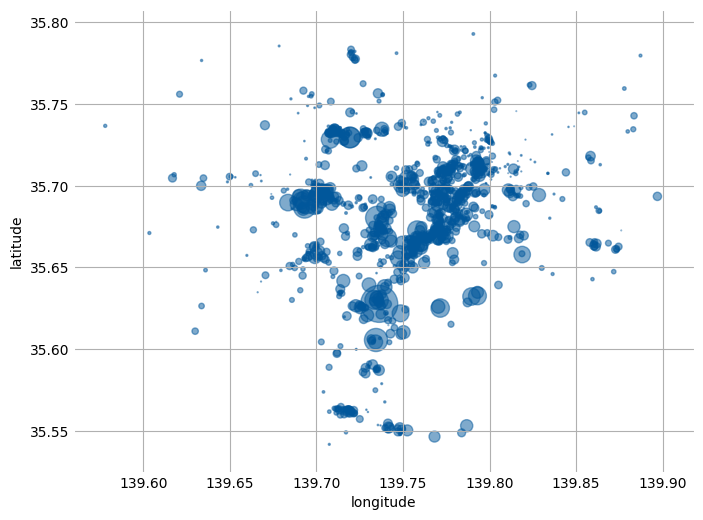

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

df_hotel.plot(kind='scatter', x='longitude', y='latitude', s=df_hotel.RoomNum/5, alpha=0.5, ax=ax)
plt.savefig("graph-scatter.pdf")
plt.show()